In [1]:
import numpy as np
from neuralStellar import *
from datetime import datetime
from keras import backend

Using TensorFlow backend.


Data headers = 
['', 'model_number', 'star_mass', 'star_age', 'star_feh', 'star_MLT', 'star_fov', 'effective_T', 'luminosity', 'radius', 'log_g', 'surface_h1', 'surface_he4', 'center_h1', 'center_he4', 'log_center_T', 'log_center_Rho', 'he_core_mass', 'delta_nu', 'delta_Pg', 'nu_max', 'nu_0_10', 'nu_0_11', 'nu_0_12', 'nu_0_13', 'nu_0_14', 'nu_0_15']


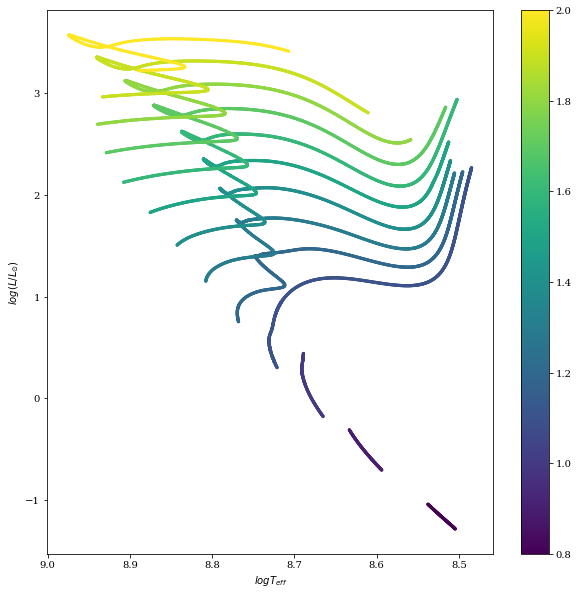

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 3,330
Trainable params: 3,330
Non-trainable params: 0
_________________________________________________________

In [13]:
file='grid_0_0.csv'
small_grid=stellarGrid(file)
small_grid.buildIndex()
small_grid.popIndex(['','star_mass','star_age','effective_T','luminosity'])
small_grid.initialData(age_range=[1,8])
small_grid.plotHR1('ranged')
#main code bit
x_in=small_grid.fetchData('evo',['mass','age'])
y_out=small_grid.fetchData('evo',['L','Teff'])
x_in, y_out=shuffleInputs(x_in,y_out)
m1=NNmodel('evo')
m1.buildModel([len(x_in),len(y_out)], 4, 32, reg=['l2',0.001])
#m1.buildModel(False, call_name='small_grid_model_test.h5')

In [14]:
m1.compileModel(0.0001,'MAE',metrics=['MAE','MSE'], beta_1=0.9999)
m1.model.optimizer.get_config()

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9999,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [ ]:
#temporary fitting code
epoch_no=50000
class showProgress(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % int(epoch_no/100) == 0:
            percent= int(np.round((epoch/int(epoch_no/100)),0))
            time=datetime.now()
            time_lapsed = (time-start_time)
            print(str(percent)+'% | epoch='+str(epoch)+'/'+str(epoch_no)+' | now='+str(time)[:-7]+
                  ' | time lapsed='+str(time_lapsed)[:-7]+' | loss='+str(np.round(logs['loss'],5)))
logdir = "logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
#logdir='logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
            
start_time=datetime.now()
m1.history=m1.model.fit(np.array(x_in).T,np.array(y_out).T,
                  epochs=epoch_no,
                  batch_size=len(x_in[0]),
                  validation_split=0.10,
                  verbose=0,
                  callbacks=[showProgress()])
print('training done! now='+str(datetime.now())+' | Time lapsed='+str(datetime.now()-start_time))
m1.model.save('small_grid_model_beta1_high.h5')

0% | epoch=0/50000 | now=2019-11-22 04:12:50 | time lapsed=0:00:02 | loss=2.25202
1% | epoch=500/50000 | now=2019-11-22 04:13:29 | time lapsed=0:00:41 | loss=1.27156
2% | epoch=1000/50000 | now=2019-11-22 04:14:05 | time lapsed=0:01:17 | loss=0.90876
3% | epoch=1500/50000 | now=2019-11-22 04:14:41 | time lapsed=0:01:53 | loss=0.5545
4% | epoch=2000/50000 | now=2019-11-22 04:15:17 | time lapsed=0:02:29 | loss=0.31656
5% | epoch=2500/50000 | now=2019-11-22 04:15:54 | time lapsed=0:03:06 | loss=0.27313
6% | epoch=3000/50000 | now=2019-11-22 04:16:31 | time lapsed=0:03:43 | loss=0.25032
7% | epoch=3500/50000 | now=2019-11-22 04:17:07 | time lapsed=0:04:19 | loss=0.2372
8% | epoch=4000/50000 | now=2019-11-22 04:17:44 | time lapsed=0:04:56 | loss=0.22809
9% | epoch=4500/50000 | now=2019-11-22 04:18:23 | time lapsed=0:05:35 | loss=0.21988


In [11]:
#m1.fitModel(x_in, y_out, 100, len(x_in[0]),'small_grid_model_test.h5', keep_log=False)

history plot saved as "small_grid_pics/history14.png"
final loss = 0.0047624656
evaluation results:
1700/1 - 0s - loss: 0.0031 - MAE: 0.0049 - MSE: 1.5138e-04
40814/1 - 1s
HR diagram saved as "small_grid_pics/HR14.png"


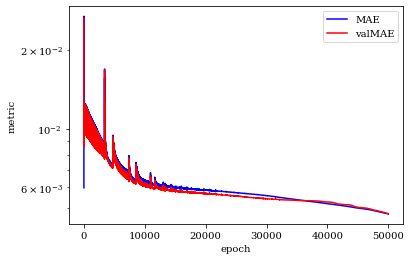

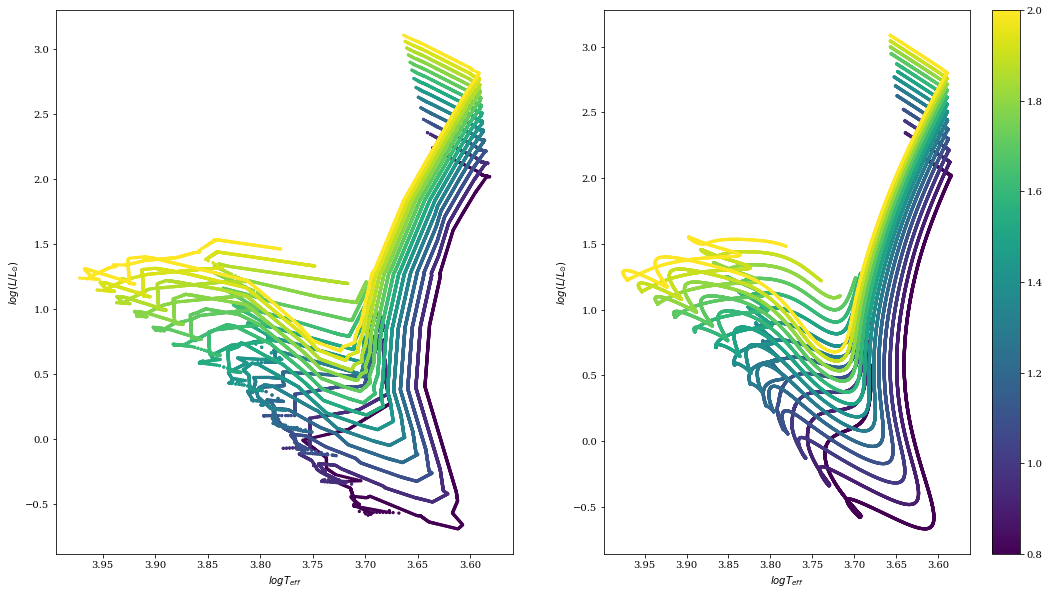

In [12]:
m1.plotHist(plot_MSE=False, savefile='small_grid_pics', trial_no=15)
print('final loss = '+str(m1.lastLoss('MAE')))
m1.evalData(small_grid, 7)
m1.plotHR(small_grid, None, savefile='small_grid_pics', trial_no=15)